In [1]:
import set_math

success import scipy
success import pandas
success import numpy
success import sympy
success import matplotlib.pyplot
Hangul OK in your MAC !!!


In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('../data/05. data_sample_V3', index_col = 0)

In [4]:
data['count'] = 1

In [83]:
data.head()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,count
0,2012-01-01,1,1,9,29,M,RA FZFG BR,Sun,holiday,1
1,2012-01-01,1,1,28,2,M,RA FZFG BR,Sun,holiday,1
2,2012-01-01,1,1,51,1,M,RA FZFG BR,Sun,holiday,1
3,2012-01-01,2,16,16,25,16,RA,Sun,holiday,1
4,2012-01-01,2,16,25,187,16,RA,Sun,holiday,1


In [6]:
data[data['units'] > 3000]

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,count
42763,2012-11-15,13,37,5,5568,M,,Thi,workday,1
84317,2013-11-21,13,37,5,3369,M,SN BR,Thi,workday,1


In [7]:
data.drop(42763, inplace = True)
data.drop(84317, inplace = True)

In [8]:
data[data['units'] > 3000]

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,count


# 비정상적인 데이터는 삭제

In [9]:
item_count = pd.DataFrame(data, columns=['item_nbr', 'count'])

In [10]:
item_count.tail()

,item_nbr,count
118691,16,1
118692,44,1
118693,65,1
118694,9,1
118695,37,1


# 1-1. 가장 많이 팔린 순으로 아이템 ID가 5, 9, 45인 것이 압도적으로 많이 팔린 것을 확인

In [11]:
count_item_nbr = item_count.groupby('item_nbr').size().reset_index(name = 'count')
count_item_nbr = count_item_nbr.sort_values( by = ['count'], ascending = False).reset_index(drop = True)
count_item_nbr.head()

,item_nbr,count
0,5,16654
1,9,15544
2,45,15105
3,16,7039
4,37,5475


# 1-2. 그 3가지 item_nbr에 대한 것들만 뽑아서 이 아이템이 판매되는 공통적인 store만 뽑아보면? ( 교집합 찾기 )


In [12]:
item_nbr_5 = data[data['item_nbr'].isin([5])].reset_index(drop = True)
item_nbr_5.tail()
item_nbr_9 = data[data['item_nbr'].isin([9])].reset_index(drop = True)
item_nbr_9.tail()
item_nbr_45 = data[data['item_nbr'].isin([45])].reset_index(drop = True)
item_nbr_45.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,count
15100,2014-10-31,17,9,45,57,M,RA,Fri,workday,1
15101,2014-10-31,17,23,45,23,M,RA,Fri,workday,1
15102,2014-10-31,17,26,45,38,M,RA,Fri,workday,1
15103,2014-10-31,17,31,45,43,M,RA,Fri,workday,1
15104,2014-10-31,17,34,45,45,M,RA,Fri,workday,1


In [13]:
nbr_5 = set(item_nbr_5['store_nbr'].unique())
nbr_9 = set(item_nbr_9['store_nbr'].unique())
nbr_45 = set(item_nbr_45['store_nbr'].unique())

print(nbr_5)
print(nbr_9)
print(nbr_45)

{2, 3, 37, 7, 8, 40, 10, 42, 44, 13, 9, 15, 18, 20, 21, 23, 26, 28}
{32, 1, 33, 34, 4, 36, 6, 39, 38, 11, 45, 14, 17, 22, 25, 27, 31}
{32, 34, 3, 37, 6, 38, 40, 9, 42, 15, 23, 25, 26, 28, 29, 31}


# 1-3. 3개의 item_nbr을 모두 판매하는 store는 없는 것을 알 수 있습니다.

- 대신 item_nbr 5와 45, 9와 45를 동시에 판매하는 store는 존재합니다.
- 신기한 것은 위 둘 사이에 교집합이 없다는 것인데... 5와 9번 아이템은 무슨 관계일까요..

In [14]:
print(nbr_5 & nbr_9 & nbr_45)

set()


In [15]:
print(nbr_5 & nbr_9)
print(nbr_5 & nbr_45)

set()
{3, 37, 40, 9, 42, 15, 23, 26, 28}


In [16]:
print(nbr_9 & nbr_45)

{32, 34, 38, 6, 25, 31}


# 2-1. 주중과 주말에 대해서도 비교를 해보면?

In [80]:
pivot_data = data.pivot_table(values = 'units', index = ['store_nbr','item_nbr'], columns=['is_holiday']).fillna(value = 0).astype(int)

In [82]:
pivot_data

is_holiday          holiday  holiday_work  workday
store_nbr item_nbr                                
1         9              41            33       24
          28              6             4        4
          40              1             1        2
          47             10            10        7
          51              5             3        4
          89              1             1        2
          93              5             7        5
          99              3             2        2
2         5              79            61       56
          11              2             2        2
          44            162           136      121
          85              1             0        1
          93              4             2        4
3         2               4             3        3
          5              79            78       56
          45             89            73       64
          93              7             5        6
          102             1             0        1
          109             4             4        4
4         9             154           108      109
          27             13            10       10
          90              2             1        1
          93              4             2        4
          96              5             3        4
          97              4             2        6
          101             2             1        1
5         16             32            24       23
          20              1             1        1
          32              1             2        1
          37             15            12       10
...                     ...           ...      ...
40        55              2             2        2
          93              5             3        5
          106             2             1        1
41        16             45            35       33
          61              2             2        2
          68             43            37       30
          86              2             2        1
          93              5             6        5
          108             8             5        6
42        5              43            46       38
          45             70            71       62
          82              1             1        1
43        3               2             1        2
          16             54            43       40
          37             16            15       12
          73              1             1        1
          93              7             2        4
          105             2             1        1
44        5              44            38       33
          62              1             3        1
          68             59            50       45
          93              5             3        5
          94              2             1        1
          105             2             0        1
45        4               1             2        1
          9              19            23       16
          22              1             2        1
          26              4             4        3
          34              2             1        1
          50              5             7        4

[255 rows x 3 columns]

# 2-2. 주말과 주중에 대해 아이템 별 판매량 변화를 알아봅시다.

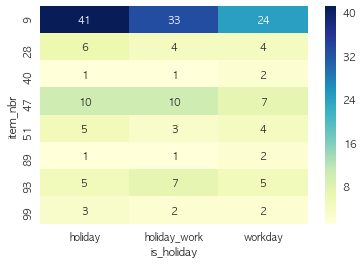

In [86]:
store_1 = pivot_data.loc[1]
sns.heatmap(store_1, cmap="YlGnBu", annot = True, fmt = '.0f')

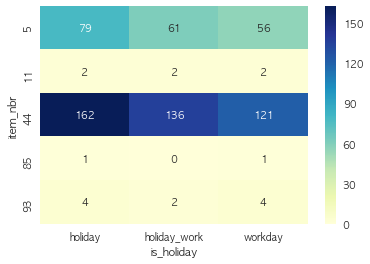

In [88]:
store_2 = pivot_data.loc[2]
sns.heatmap(store_2, cmap="YlGnBu", annot = True, fmt = '.0f')

# 2-3. 함수로 만들었습니다.

In [91]:
def draw_heatmap_holiday(nbr):
    store_nbr = pivot_data.loc[nbr]
    sns.heatmap(store_nbr, cmap="YlGnBu", annot = True, fmt = '.0f')

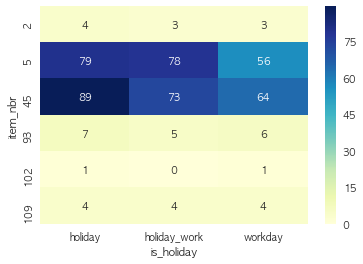

In [99]:
draw_heatmap_holiday(3)

# 2-4. holiday가 workday에 비해 sales가 높은 것은 확실히 눈으로 확인할 수 있네요

In [27]:
data_joint = pd.DataFrame(depart_missing, columns=['station_nbr', 'units', 'is_holiday'])
data_joint.head()

,station_nbr,units,is_holiday
0,1,29,holiday
1,1,2,holiday
2,1,1,holiday
3,7,214,holiday
4,7,112,holiday


# 코드섬도 확인할 때 3년 동안의 코드섬 경향도 한번 조사해 볼 필요가 있을 것 같아요